In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import pickle
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Default dimensions
img_width, img_height = 224, 224 
output_file_name = 'CrisisMMD_v2.0/multimodal_bert_vgg16.npy'
#Create a bottleneck file
top_model_weights_path = "drive/MyDrive/Colab Notebooks/bottleneck_fc_model.h5"
# loading up our datasets
train_data_dir = 'drive/MyDrive/Colab Notebooks/train1/'
validation_data_dir = 'drive/MyDrive/Colab Notebooks/val1/'
 
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50 

In [ ]:
#Loading vgg16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save("bottleneck_features_train.npy", bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
with open(output_file_name, 'wb') as handle:
  pickle.dump(bottleneck_features_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
print ("Time: ", elapsed)

FileNotFoundError: ignored

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train1.npy', 'rb') as handle:
        bottleneck_features_train = pickle.load(handle)
np.save('bottleneck_features_train.npy', bottleneck_features_train) 

In [ ]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 13608 images belonging to 2 classes.


In [ ]:
#Now for validation
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
output_file = 'CrisisMMD_v2.0/multimodal_val_vgg16_bert.npy'
with open(output_file, 'wb') as handle:
  pickle.dump(bottleneck_features_validation, handle, protocol=pickle.HIGHEST_PROTOCOL)
print ('Time: ', elapsed)

Found 2237 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


KeyboardInterrupt: ignored

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/val1.npy', 'rb') as handle:
        bottleneck_features_validation = pickle.load(handle)
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

In [ ]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 2237 images belonging to 2 classes.


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/test1.npy', 'rb') as handle:
        bottleneck_features_test = pickle.load(handle)
np.save('bottleneck_features_test.npy', bottleneck_features_test) 

In [ ]:
#test data
test_data_dir='/content/drive/MyDrive/Colab Notebooks/test1'
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 2237 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import tensorflow_hub
import os


import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


import re
import gensim
import seaborn
import random
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=b720126a3407e1bd35f312a791d0bc7cfa4275af8cda804e5f47052d0ec60c4c
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=42a7dbfc46824c224935492567fe3d723c7a23b82cb942fc7717a1d5738dec28
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=3692b116712823f5aa59784fc652e8233b9dabccf00b18934646fbe3d653cb12
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
import bert

In [ ]:
from bert.tokenization.bert_tokenization import FullTokenizer

In [ ]:
def seeding(seed):
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seeding(15)

In [ ]:
import tensorflow_hub
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = tensorflow_hub.KerasLayer(module_url, trainable=True)

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_informative_text_img_train.tsv", sep='\t')
df_train.shape

(13608, 9)

In [ ]:
df1=df_train[df_train['label']=='informative']
df1.shape

(8341, 9)

In [ ]:
df2=df_train[df_train['label']=='not_informative']
df2.shape

(5267, 9)

In [ ]:
df_train=pd.concat([df1,df2])
df_train.shape

(13608, 9)

In [ ]:
df_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_informative_text_img_dev.tsv", sep='\t')
df_val.shape

(2237, 9)

In [ ]:
df3=df_val[df_val['label']=='informative']
df3.shape

(1407, 9)

In [ ]:
df4=df_val[df_val['label']=='not_informative']
df4.shape

(830, 9)

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_informative_text_img_test.tsv", sep='\t')
df_test.shape

(2237, 9)

In [ ]:
df5=df_test[df_test['label']=='informative']
df5.shape

(1373, 9)

In [ ]:
df6=df_test[df_test['label']=='not_informative']
df6.shape

(864, 9)

In [ ]:
df_test=pd.concat([df5,df6])

In [ ]:
#df7=pd.concat([df3,df5])
#df8=pd.concat([df4,df6])
df_val=pd.concat([df3,df4])
df_val.shape

(2237, 9)

In [ ]:
df_train.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [ ]:
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)
df_val= df_val.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)

In [ ]:
df_test= df_test.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)

In [ ]:
def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [ ]:
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
df_val.tweet_text = df_val.tweet_text.apply(preprocess)

In [ ]:
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [ ]:
df_train.reset_index(inplace = True)
df_val.reset_index(inplace = True)

In [ ]:
df_test.reset_index(inplace = True)

In [ ]:
vocabularyfile = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocabularyfile, do_lower_case)

In [ ]:
def embedding(string):
    string = tokenizer.tokenize(string)
            
    string = string[:maxstringlength-2]
    input_sequence = ["[CLS]"] + string + ["[SEP]"]
    pad_len = maxstringlength - len(input_sequence)

    tokens = tokenizer.convert_tokens_to_ids(input_sequence)
    tokens += [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * maxstringlength
    return tokens, pad_masks, segment_ids

In [ ]:
def formatting(data):
    tokenlist = []
    masklist = []
    segmentlist = []
    for i in range(data.shape[0]):
        tokenlist.append(data[i][0])
        masklist.append(data[i][1])
        segmentlist.append(data[i][2])
    return np.array(tokenlist), np.array(masklist), np.array(segmentlist)

In [ ]:
maxstringlength = 22
trainingdata = df_train.tweet_text.apply(embedding)
valdata = df_val.tweet_text.apply(embedding)

X_train = formatting(trainingdata)
X_val = formatting(valdata)

# Y_train = df_train.label_text.values
# Y_val = df_val.label_text.values

In [ ]:
testdata=df_test.tweet_text.apply(embedding)
X_test=formatting(testdata)

In [ ]:
X_test[0].shape

(2237, 22)

In [ ]:
X_train[0].shape

(13608, 22)

In [ ]:
# prepare input data
def One_Hot_Encoding(Y_train, Y_val):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(Y_train)
    categoryarray=ohe.categories_
    Y_train_enc = ohe.transform(Y_train)
    Y_test_enc = ohe.transform(Y_test)
    Y_val_enc = ohe.transform(Y_val)
    return categoryarray, Y_train_enc, Y_val_enc

In [ ]:
noofcategories = df_train["label"].nunique()

In [ ]:
categoryarray, Y_train, Y_val = One_Hot_Encoding(np.array(df_train.label_text.to_list()).reshape(-1,1), np.array(df_val.label_text.to_list()).reshape(-1,1))       # Neural networks expects input values to be numerical.
Y_train = Y_train.toarray()
Y_val = Y_val.toarray()
Y_train

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
import warnings
import datetime
import optparse
import os, errno
import keras.callbacks as callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, CSVLogger, TensorBoard
from gensim.models import KeyedVectors
from keras.layers import Input, Activation, Add, Concatenate, Dropout
from keras.models import load_model
from keras.layers import concatenate
from time import time
import pickle
from keras.layers.normalization import BatchNormalization
import keras
from keras.applications.resnet50 import ResNet50

In [ ]:
def create_cnn():
  
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:])) 
    model.add(Dense(20, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [ ]:
def create_bert(bert_layer, noofcategories, maxstringlength=512):
    tokens = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="tokens")
    masks = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="masks")
    segments = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="segments")

    pooled_output, sequence_output = bert_layer([tokens, masks, segments])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.4)(net)
    out = tf.keras.layers.Dense(20, activation='relu')(net)
    
    model = tf.keras.models.Model(inputs=[tokens, masks, segments], outputs=out)
    #model.compile(tf.keras.optimizers.Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
bert_model = create_bert(bert_layer, noofcategories, maxstringlength=22)
cnn = create_cnn()
combinedInput = concatenate([bert_model.output, cnn.output])

In [ ]:
# The final fully-connected layer
x = Dense(10, activation="relu")(combinedInput)
x = Dense(2, activation="softmax")(x)

In [ ]:
# The final model accepts numerical data on the BERT input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bert_model.input, cnn.input], outputs=x)

In [ ]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
 
# train the model
history = model1.fit([X_train, train_data], train_labels, validation_data=([X_val, validation_data], validation_labels), epochs=5, batch_size=8)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

Epoch 1/5
1701/1701 [==============================] - 340s 182ms/step - loss: 0.6253 - acc: 0.6676 - val_loss: 0.5737 - val_acc: 0.7050
Epoch 2/5
1701/1701 [==============================] - 302s 177ms/step - loss: 0.5403 - acc: 0.7205 - val_loss: 0.5677 - val_acc: 0.7090
Epoch 3/5
1701/1701 [==============================] - 301s 177ms/step - loss: 0.5130 - acc: 0.7470 - val_loss: 0.6204 - val_acc: 0.6804
Epoch 4/5
1701/1701 [==============================] - 300s 177ms/step - loss: 0.4656 - acc: 0.7724 - val_loss: 0.5972 - val_acc: 0.7054
Epoch 5/5
1701/1701 [==============================] - 300s 177ms/step - loss: 0.4132 - acc: 0.8020 - val_loss: 0.7034 - val_acc: 0.6848
Time taken to run: 0:25:44.455638


In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def cnn_evaluation(model, history,test_features, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_pred = np.round(model.predict([test_features, test_images]))
    
    target_names = ['Informative', 'Non-Informative']
    classification_metrics = metrics.classification_report(test_labels, y_pred, target_names=target_names )
    print(classification_metrics)
    categorical_test_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
    categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
    cm= confusion_matrix(categorical_test_labels, categorical_preds)
    plot_confusion_matrix(cm, target_names)

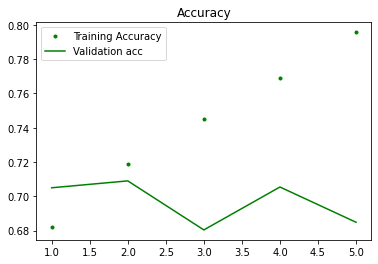

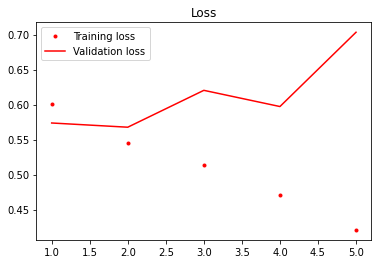

70/70 [==============================] - 11s 160ms/step - loss: 0.7034 - acc: 0.6848
Validation Loss: 0.7033882737159729
Validation Accuracy: 0.6848458051681519
                 precision    recall  f1-score   support

    Informative       0.74      0.77      0.76      1407
Non-Informative       0.58      0.54      0.56       830

      micro avg       0.68      0.68      0.68      2237
      macro avg       0.66      0.65      0.66      2237
   weighted avg       0.68      0.68      0.68      2237
    samples avg       0.68      0.68      0.68      2237

Confusion matrix, without normalization


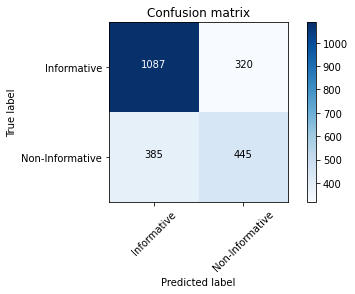

In [ ]:
cnn_evaluation(model1, history, X_val, validation_data,validation_labels, class_names=None, model_name=None)

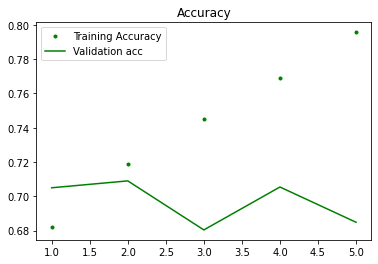

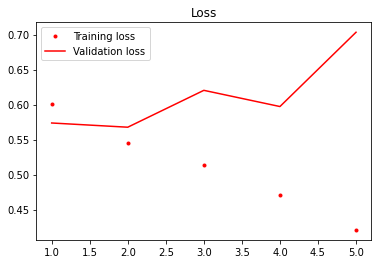

70/70 [==============================] - 12s 164ms/step - loss: 0.7109 - acc: 0.6898
Test Loss: 0.7108774781227112
Test Accuracy: 0.689763069152832
                 precision    recall  f1-score   support

    Informative       0.73      0.79      0.76      1373
Non-Informative       0.61      0.54      0.57       864

      micro avg       0.69      0.69      0.69      2237
      macro avg       0.67      0.66      0.66      2237
   weighted avg       0.68      0.69      0.69      2237
    samples avg       0.69      0.69      0.69      2237

Confusion matrix, without normalization


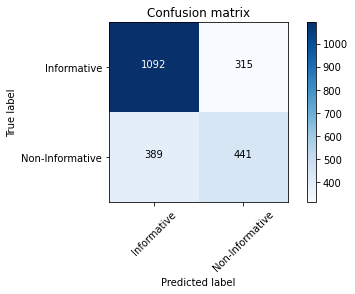

In [ ]:
cnn_evaluation(model1, history, X_test, test_data,test_labels, class_names=None, model_name=None)

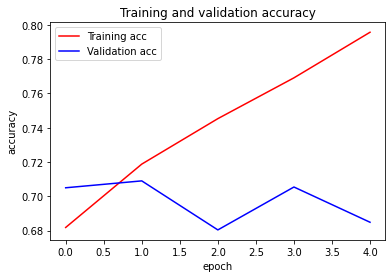

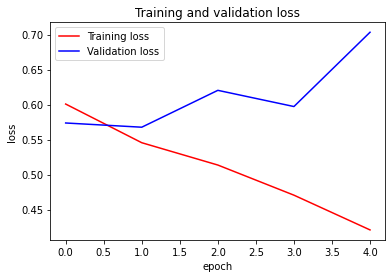

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
Now Using BiLSTM

In [ ]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sys
from sklearn import preprocessing
import re
from collections import Counter
import random
random.seed(1337)
import tensorflow as tf
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
#print(stop_words)

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#cleaning the text
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

# Algining the text according to images

In [ ]:
df_train = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_train.tsv", sep='\t')
df_train.shape

(13608, 9)

In [ ]:
df1=df_train[df_train['label']=='informative']
df1.shape

(8341, 9)

In [ ]:
df2=df_train[df_train['label']=='not_informative']
df2.shape
df=pd.concat([df1,df2])
df.shape

(13608, 9)

In [ ]:
df.tweet_text = df.tweet_text.apply(preprocess)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.tweet_text)    #creates word_index dictionary based on frequency of the word

vocabularysize = len(tokenizer.word_index) + 1
print("Total words", vocabularysize)
xtrain_sequences = tokenizer.texts_to_sequences(df.tweet_text)

Total words 18434


In [ ]:
xtrain_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtrain_sequences, padding="post", maxlen=25)

In [ ]:
df_val = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_dev.tsv", sep='\t')
df_val.shape
df_test=pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_test.tsv", sep='\t')
df_test.shape

(2237, 9)

In [ ]:
df3=df_val[df_val['label']=='informative']
df4=df_val[df_val['label']=='not_informative']
df_valid=pd.concat([df3,df4])

In [ ]:
df5=df_test[df_test['label']=='informative']
df6=df_test[df_test['label']=='not_informative']
df_test=pd.concat([df5,df6])

In [ ]:
df_valid.tweet_text = df_valid.tweet_text.apply(preprocess)
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [ ]:
xval_sequences = tokenizer.texts_to_sequences(df_valid.tweet_text)
xtest_sequences = tokenizer.texts_to_sequences(df_test.tweet_text)

In [ ]:
xval_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xval_sequences, padding="post", maxlen=25)
xtest_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtest_sequences, padding="post", maxlen=25)

In [ ]:
#Train Embeddings
import pandas as pd
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_train.tsv',sep='\t')
df_train = df_train.drop_duplicates(subset="tweet_id")
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_train = df_train.dropna()
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
documents = [_text.split() for _text in df_train.tweet_text]

In [ ]:
import multiprocessing
import gensim
EMBEDDINGLENGTH=300
w2v_model = gensim.models.Word2Vec(size=EMBEDDINGLENGTH, 
                                   window=2, 
                                   min_count=1,
                                   sg=1)

In [ ]:
w2v_model.save("w2v_model.model")
w2v_model.build_vocab(documents)
wordvectors = w2v_model.wv    #keyed vector object
#print("Vocab size:", len(wordvectors))

In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=50)

(3098183, 3544150)

In [ ]:
vocabularysize=18434
embedding_matrix = np.zeros((vocabularysize, EMBEDDINGLENGTH))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)


(18434, 300)


In [ ]:
train_data.shape[1:]

(7, 7, 512)

In [ ]:
def create_bilstm():
    
    embedding_layer = tf.keras.layers.Embedding(input_dim=vocabularysize,
                                            output_dim=EMBEDDINGLENGTH,
                                            weights=[embedding_matrix],
                                            input_length=25,
                                            trainable=False)
    model = Sequential()
    model.add(embedding_layer)
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    model.add(Dense(20,activation="relu"))
    return model

In [ ]:
def create_cnn():
  
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:])) 
    model.add(Dense(20, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [ ]:
bilstm = create_bilstm()
cnn = create_cnn()
combinedInput = concatenate([bilstm.output, cnn.output])

In [ ]:
# The final fully-connected layer 
x = Dense(10, activation="relu")(combinedInput)
x = Dense(2, activation="softmax")(x)

In [ ]:
# The final model accepts numerical data on the BiLSTM input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bilstm.input, cnn.input], outputs=x)

In [ ]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
 
# train the model
history = model1.fit([xtrain_padded_sequences, train_data], train_labels, validation_data=([xval_padded_sequences, validation_data], validation_labels), epochs=5, batch_size=50)
#model1_history = model1.fit([trainAttrX, trainImagesX], trainY, validation_data=([testAttrX, testImagesX], testY), epochs=5, batch_size=10)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

Epoch 1/5
273/273 [==============================] - 38s 21ms/step - loss: 0.6071 - acc: 0.6902 - val_loss: 0.4898 - val_acc: 0.7640
Epoch 2/5
273/273 [==============================] - 4s 16ms/step - loss: 0.4432 - acc: 0.7894 - val_loss: 0.4837 - val_acc: 0.7720
Epoch 3/5
273/273 [==============================] - 4s 16ms/step - loss: 0.3937 - acc: 0.8198 - val_loss: 0.5891 - val_acc: 0.7246
Epoch 4/5
273/273 [==============================] - 4s 16ms/step - loss: 0.3676 - acc: 0.8352 - val_loss: 0.5338 - val_acc: 0.7488
Epoch 5/5
273/273 [==============================] - 4s 16ms/step - loss: 0.3069 - acc: 0.8674 - val_loss: 0.5854 - val_acc: 0.7497
Time taken to run: 0:00:55.923138


In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def cnn_evaluation(model, history,test_features, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_pred = np.round(model.predict([test_features, test_images]))
    
    target_names = ['Informative', 'Non-Informative']
    classification_metrics = metrics.classification_report(test_labels, y_pred, target_names=target_names )
    print(classification_metrics)
    categorical_test_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
    categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
    cm= confusion_matrix(categorical_test_labels, categorical_preds)
    plot_confusion_matrix(cm, target_names)

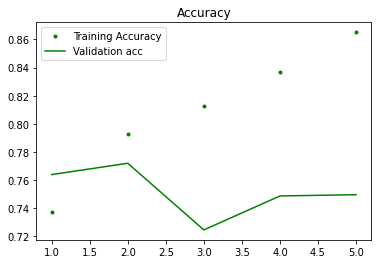

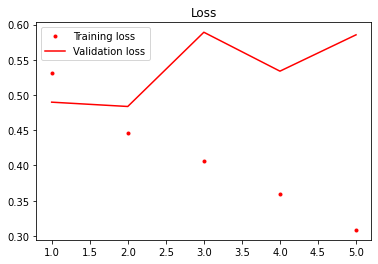

70/70 [==============================] - 1s 8ms/step - loss: 0.5782 - acc: 0.7510
Test Loss: 0.5782210826873779
Test Accuracy: 0.7510058283805847
                 precision    recall  f1-score   support

    Informative       0.81      0.77      0.79      1373
Non-Informative       0.66      0.72      0.69       864

      micro avg       0.75      0.75      0.75      2237
      macro avg       0.74      0.75      0.74      2237
   weighted avg       0.76      0.75      0.75      2237
    samples avg       0.75      0.75      0.75      2237

Confusion matrix, without normalization


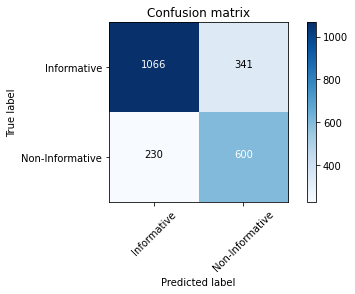

In [ ]:
cnn_evaluation(model1, history, xtest_padded_sequences, test_data,test_labels, class_names=None, model_name=None)

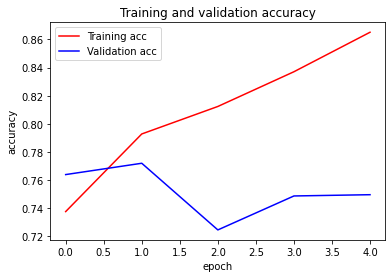

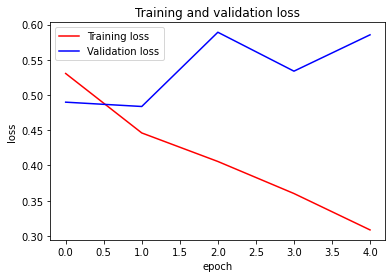

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()
